# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Bidirectional, GlobalMaxPooling1D, Lambda, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import keras.backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.model_selection import train_test_split

# Load in the data

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), _ = mnist.load_data()
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [3]:
x_train.dtype

dtype('uint8')

# Extract first 10000 samples

In [4]:
X  = x_train[0:10000, :]

In [5]:
X.shape # N x T x D

(10000, 28, 28)

In [6]:
y = y_train[0:10000]

In [7]:
y.shape

(10000,)

# Perform Train test split

In [8]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.1)

In [9]:
train_data[0].shape  # shape of the first sample of train_data

(28, 28)

# Create the Model

In [10]:
# input is an image of size 28x28

input = Input(shape=(train_data[0].shape))

# First LSTM ( up-down )
rnn1 = Bidirectional(LSTM(128, return_sequences=True)) # return_sequences=True so that we get all the hidden states
X1 = rnn1(input) # output is N x D x 2H
X1 = GlobalMaxPooling1D()(X1) # output is N x 2H

# Second LSTM ( left-right )
rnn2 = Bidirectional(LSTM(128, return_sequences=True))

# Custom layer. We need to create this layer to switch the dimension. We cannot do it directly because we get the 
# the error that history did not found, so we have to create a layer.

permutor = Lambda(lambda t: K.permute_dimensions(t, pattern=(0, 2, 1)))

X2 = permutor(input)
X2 = rnn2(X2) # output is N x D x 2H
X2 = GlobalMaxPooling1D()(X2) # output is N x 2H

# put them together
concatenator = Concatenate(axis=1)
X = concatenator([X1, X2]) # output is N x 4H

# final dense layer
output = Dense(10, activation='softmax')(X) # N x C

model = Model(inputs=input, outputs=output)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 lambda (Lambda)                (None, 28, 28)       0           ['input_1[0][0]']                
                                                                                                  
 bidirectional (Bidirectional)  (None, 28, 256)      160768      ['input_1[0][0]']                
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 28, 256)     160768      ['lambda[0][0]']                 
 )                                                                                            

# Compile the Model

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Model

In [13]:
hist = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs = 50)

Epoch 1/50
282/282 [==============================] - 16s 39ms/step - loss: 0.6540 - accuracy: 0.8276 - val_loss: 0.2604 - val_accuracy: 0.9420
Epoch 2/50
282/282 [==============================] - 10s 34ms/step - loss: 0.1901 - accuracy: 0.9494 - val_loss: 0.1789 - val_accuracy: 0.9510
Epoch 3/50
282/282 [==============================] - 10s 35ms/step - loss: 0.1208 - accuracy: 0.9701 - val_loss: 0.1580 - val_accuracy: 0.9540
Epoch 4/50
282/282 [==============================] - 10s 34ms/step - loss: 0.0938 - accuracy: 0.9751 - val_loss: 0.1455 - val_accuracy: 0.9560
Epoch 5/50
282/282 [==============================] - 10s 36ms/step - loss: 0.0780 - accuracy: 0.9810 - val_loss: 0.1409 - val_accuracy: 0.9620
Epoch 6/50
282/282 [==============================] - 10s 36ms/step - loss: 0.0619 - accuracy: 0.9837 - val_loss: 0.1369 - val_accuracy: 0.9580
Epoch 7/50
282/282 [==============================] - 10s 35ms/step - loss: 0.0480 - accuracy: 0.9897 - val_loss: 0.1411 - val_accuracy:

# Visualize the Model Performance

In [16]:
trainAcc = [100 * x for x in hist.history['accuracy']]
testAcc = [100 * x for x in hist.history['val_accuracy']]

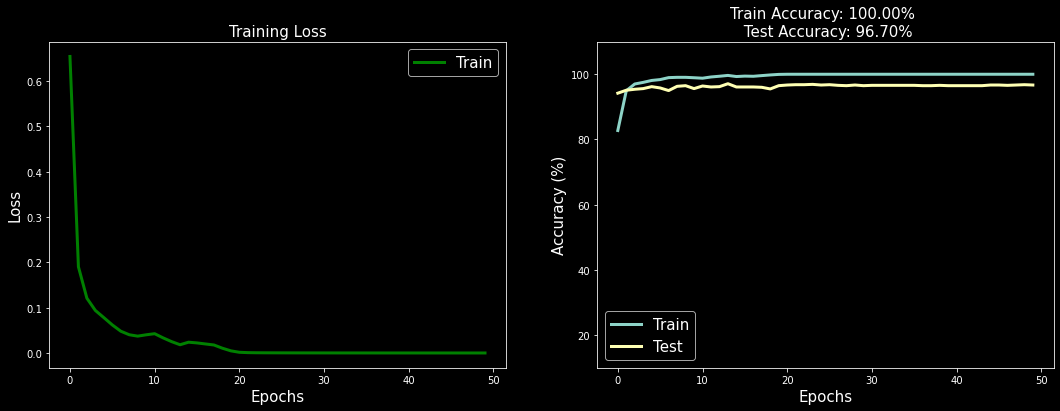

In [17]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(hist.history['loss'], 'g', lw = 3, label = 'Train')
ax[0].set_xlabel('Epochs', fontsize = 15)
ax[0].set_ylabel('Loss', fontsize = 15)
ax[0].legend(fontsize = 15)
ax[0].set_title('Training Loss', fontsize = 15)


ax[1].plot(trainAcc, label ='Train', lw = 3)
ax[1].plot(testAcc, label ='Test', lw = 3)
ax[1].set_xlabel('Epochs', fontsize = 15)
ax[1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1].set_ylim([10,110])
ax[1].set_title(f'Train Accuracy: {trainAcc[-1]:.2f}% \n Test Accuracy: {testAcc[-1]:.2f}%', fontsize = 15)
ax[1].legend(fontsize = 15)

plt.show()

# Creating Function Using Lambda

In [ ]:
square = lambda num: num ** 2   # we use lamda when we need quick results and we dont want to save it for longer time

In [ ]:
square(6)

# Understanding Permutor

In [22]:
x = np.random.rand(32, 28, 10)

In [23]:
permutor = Lambda(lambda t: K.permute_dimensions(t, pattern=(0, 2, 1)))

In [24]:
output = permutor(x)

In [25]:
output.shape

TensorShape([32, 10, 28])